In [40]:
import sys
import os
import pandas as pd
import IPython.display as ipd
import numpy as np

module_path = os.path.abspath(os.path.join('..'))

sys.path.insert(1, module_path + '/src')
import utility

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.font_manager import FontProperties
font = FontProperties(fname = module_path + '/src/visualization/CharterRegular.ttf', size = 10, weight = 1000)
font_small = FontProperties(fname = module_path + '/src/visualization/CharterRegular.ttf', size = 8, weight = 1000)
colors = ['#F94144', '#90BE6D', '#577590','#F3722C', '#F8961E', '#F9844A', '#F9C74F', '#43AA8B', '#4D908E', '#277DA1']
colors_opa = ['#F9414466', '#90BE6D66', '#57759066','#F3722C66', '#F8961E66',
              '#F9844A66', '#F9C74F66', '#43AA8B66', '#4D908E66', '#277DA166']

sns.set_palette(sns.color_palette(colors))

from sktime.utils.data_io import load_from_tsfile_to_dataframe

figure_path = module_path + '/figures/'

target_rate = 41000

In [99]:
audio_file = '/home/andrine/Desktop/TromsoDataset/Hasse413/21111309_lungelyd_6.wav'

sr, audio = utility.read_wav_file(audio_file, target_rate)
audio = utility.denoise_audio(audio)
unfiltered, sr = utility.downsample(audio, sr, 4000), 4000

In [117]:
import numpy as np
import os
from scipy.io import wavfile
from scipy.signal import butter, lfilter

lowcut = 150
highcut = 1950
FRAME_RATE = 4000

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a

def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = lfilter(b, a, data)
    return y

def bandpass_filter(buffer):
    return butter_bandpass_filter(buffer, lowcut, highcut, FRAME_RATE, order=6)


filtered = np.apply_along_axis(bandpass_filter, 0, unfiltered).astype('float64')
wavfile.write(module_path + '/notebooks/filtered.wav', FRAME_RATE, filtered)
wavfile.write(module_path + '/notebooks/unfiltered.wav', FRAME_RATE, audio)

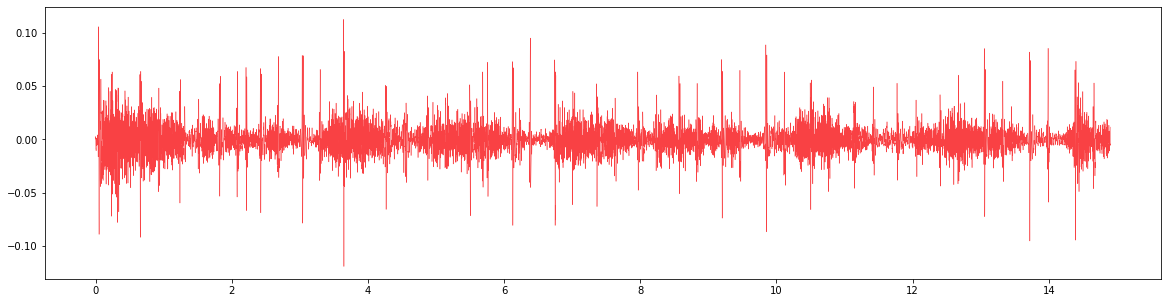

In [115]:
f, ax = plt.subplots(1,1)
f.set_size_inches(20, 5)


duration = float(len(unfiltered)) / sr
T = 1.0/sr
N = int(duration / T)
x = np.linspace(0.0, N*T, N +1 )

if len(x) != len(unfiltered):
    x = np.linspace(0.0, N*T, N)

ax.plot(x, unfiltered, linewidth = 0.5)

ipd.Audio(unfiltered, rate = sr)

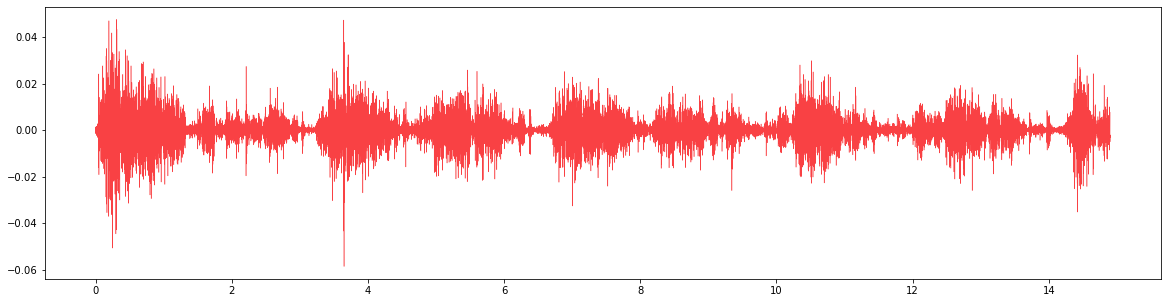

In [118]:
f, ax = plt.subplots(1,1)
f.set_size_inches(20, 5)


duration = float(len(filtered)) / sr
T = 1.0/sr
N = int(duration / T)
x = np.linspace(0.0, N*T, N +1 )

if len(x) != len(audio):
    x = np.linspace(0.0, N*T, N)

ax.plot(x, filtered, linewidth = 0.5)

ipd.Audio(filtered, rate = sr)

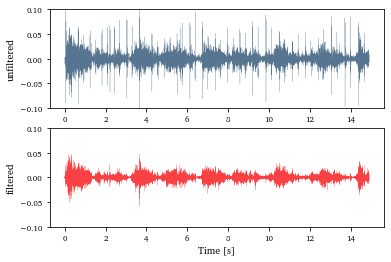

In [107]:
plot_dict = {
    'unfiltered' : unfiltered, 
    'filtered': filtered
}

def znorm(timeseries):
    mean = np.mean(timeseries)
    sd = np.std(timeseries)
    return (timeseries - mean)/sd

f, axs = plt.subplots(2,1)
f.set_size_inches(6, 4)

for name, ax in zip(plot_dict.keys(), axs):
    #audio = znorm(sound)
    #audio = labels[name]
    audio = plot_dict[name]
    
    duration = float(len(audio)) / sr
    T = 1.0/sr
    N = int(duration / T)
    x = np.linspace(0.0, N*T, N +1 )
    if len(x) != len(audio):
        x = np.linspace(0.0, N*T, N)
    
    if name == 'unfiltered':
        ax.plot(x, audio, linewidth = 0.2, c = colors[2])
    else:
        ax.plot(x, audio, linewidth = 0.2, c = colors[0])
    ax.set_ylim(-0.1, 0.1)
    for label in ax.get_yticklabels() :
        label.set_fontproperties(font_small)
    for label in ax.get_xticklabels() :
        label.set_fontproperties(font_small)
    ax.set_ylabel(f'{name}', fontproperties = font)
    ax.set_xlabel('Time [s]', fontproperties = font)

f.savefig(figure_path + f'filtered_heart_sound.pdf', bbox_inches='tight')

In [92]:
for key, val in plot_dict.items():
    print(key, val)

unfiltered unfiltered
filtered [ 0.00020593  0.00013941  0.00109503 ... -0.00265114 -0.00313207
 -0.00214028]
